TASK 1 Train a classifier with train.csv.

In [311]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [312]:
# Import Data
data_train = pd.read_csv('hw2_train.csv')
data_test = pd.read_csv('hw2_test.csv')
# Train Data Set
x_train = data_train.drop(['y'], axis = 1)
x1_train = data_train['x1']
x2_train = data_train['x2']
y_train = data_train['y']
# Test Data Set
x_test = data_test.drop(['y'], axis = 1)
x1_test = data_test['x1']
x2_test = data_test['x2']
y_test = data_test['y']

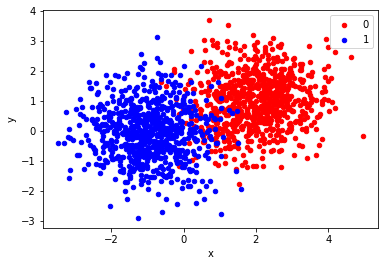

In [313]:
# Visualize Data
df = pd.DataFrame(dict(x=data_train['x1'], y=data_train['x2'], label=data_train['y']))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [314]:
def sigmoid(x1,x2,b0,b1,b2):
    return 1 / (1 + np.exp(-1 * b0 + -1 * b1 * x1 + -1 * b2 * x2))

In [315]:
# Logistic Regression Function
def logistic_regression(x1,x2,y):

    # Initialization
    b0 = 0
    b1 = 0
    b2 = 0
    m = int(len(x1))
    l_rate = 0.1 #step size or learning rate

    for epoch in range(len(x1)):
        y_pred = sigmoid(x1,x2,b0,b1,b2)
        # Calculate loss
        loss = sum((y - y_pred)**2)
        # Partial derivatives of cost function
        pd_b0 = 1/m * sum((y_pred - y))
        pd_b1 = 1/m * sum((y_pred - y) * x1) 
        pd_b2 = 1/m * sum((y_pred - y) * x2)

        # Update parameters
        b0 = b0 - l_rate * pd_b0
        b1 = b1 - l_rate * pd_b1
        b2 = b2 - l_rate * pd_b2

    return b0, b1, b2, loss

In [316]:
# Result for task 1
b0, b1, b2, loss = logistic_regression(x1_train, x2_train, y_train)

print(f"Result of parameters:\nb0: {b0}\nb1: {b1}\nb2: {b2}\n")
print(f"Train Cost: {loss}")

Result of parameters:
b0: 1.9174477275040331
b1: -3.3005265286474095
b2: -0.9790809107290367

Train Cost: 47.40494622510558


TASK 2 Classify the data in test.csv using the trained model

In [317]:
# Result for task 2
y_pred = sigmoid(x1_test,x2_test,b0,b1,b2)
loss_test = sum((y_test - y_pred)**2)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

print(f"Test Cost: {loss_test}")

accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy +=1
print(f"Accuracy = {accuracy / len(y_pred)}")

Test Cost: 13.514992525012119
Accuracy = 0.964


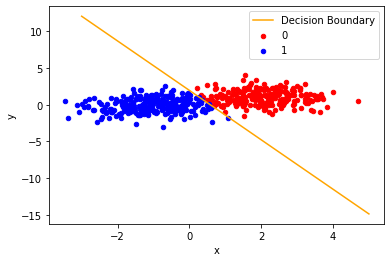

In [318]:
# Plot of the graph
c = -b0/b2
m = -b1/b2

X_db = np.linspace(-3, 5, 1000)
y_db = m*X_db + c

df = pd.DataFrame(dict(x=x1_test, y=x2_test, label=y_pred))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

ax.plot(X_db, y_db, 'orange', label='Decision Boundary')
leg = ax.legend()
plt.show()

THE CODE BELOW JUST TO COMPARE IF WE'RE USING SKLEARN

In [319]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Making predictions
y_pred_sk = lr_model.predict(x_test)

# Accuracy
print(f"Accuracy = {lr_model.score(x_test, y_test)}")

Accuracy = 0.966
